# Import Basic Library

In [109]:
import numpy as np 
import pandas as pd
from   tqdm import tqdm 

import statsmodels.api as sm 
import matplotlib.pyplot as plt 

# Constructing the Proxy Dataset For Linear Regression

Estimated Parameters :  [6.49973506 1.97522436]


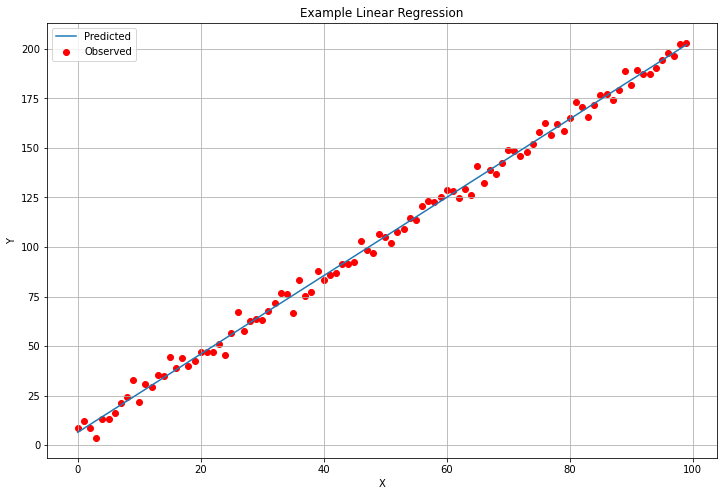

In [110]:
# Artificially create dataset with constant variance around a line
xs = np.arange(100) 
y1 = 5 + 2*xs + 4 * np.random.randn(100) 

# Get results of linear regression  --> Using Statsmodel.api check the OLS parameters Estimation . 
slr1      = sm.OLS(y1, sm.add_constant(xs)).fit()
fit1      = slr1.params[0] + slr1.params[1] * xs
sm_params = slr1.params
print("Estimated Parameters : " , sm_params)


#  -----  Plot data and regression line  -------
figf,ax = plt.subplots(figsize=(12,8))
ax.set_title('Example Linear Regression')
ax.scatter(xs, y1,color='red')
ax.plot(xs, fit1)
plt.legend(['Predicted', 'Observed'])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

# Make it a Dataset and Assume we do not know how we built it 

In [111]:
Example_Dataset = pd.DataFrame()
Example_Dataset['x'] = xs 
Example_Dataset['y'] = y1 
Example_Dataset

,x,y
0,0,8.580349
1,1,12.260096
2,2,8.447813
3,3,3.613759
4,4,13.413980
...,...,...
95,95,194.414333
96,96,197.611375
97,97,196.127387
98,98,202.455227


# Check the Dataset shape and construct initial parameters

In [112]:
x = Example_Dataset['x'].values.reshape(-1,1)
y = Example_Dataset['y'].values.reshape(-1,1)
# x = sm.add_constant(x)
vector_x = sm.add_constant(x)


print(vector_x.shape)
print(x.shape)
print(y.shape)

(100, 2)
(100, 1)
(100, 1)


# Conduct Linear Regression Gradient Descent

In [113]:
# Building the model
m = 0
c = 0
weights = np.array([c,m]).reshape(2,1)

c = weights[0]
m = weights[1]

L             = 0.0001         # The learning Rate
n             = float(len(x))  # Number of elements in X
Epochs        = 50
torelence     = 1e-6

def mean_square_error(y_pred,y) :

    mse_score = np.linalg.norm(y_pred-y,2) / y_pred.shape[0]
    mse_score = np.sqrt(mse_score)
    
    return mse_score

mse_list =[]


# Performing Gradient Descent 

for _ in tqdm(range(Epochs)) :

    while True : 
        # --------- Linear Form --------- 
        y_pred = c +  x * m  

        D_m = (-2/n) * sum(x * (y - y_pred))  # Derivative wrt m
        D_c = (-2/n) * sum(y - y_pred)  # Derivative wrt c

        # # weights = weights - L * D
        m = m - L * D_m  # Update m
        c = c - L * D_c  # Update c
        
        # ---------  Matrix Form   --------- 
        vector_y_pred   = vector_x @ weights
        prediction_loss = vector_y_pred  - y

        Loss_Gradient   = (2/n) * vector_x.T @  prediction_loss 
        old_weights     = weights
        weights         = weights - L * Loss_Gradient

        # Weights Difference --> to converge
        weights_difference    = np.linalg.norm(weights - old_weights,2) 
        
        if weights_difference < torelence : 
            break

    # mse_list .append(mean_square_error(y_pred,y))

print("------ Linear Form ------")
print(c)
print(m)
print("------ Matrix Form ------")
print(weights)

100%|██████████| 50/50 [00:13<00:00,  3.69it/s]

------ Linear Form ------
[6.48008038]
[1.97552069]
------ Matrix Form ------
[[6.48008038]
 [1.97552069]]


# Recall Statsmodels.api Parameters Estimation 

In [115]:
slr1      = sm.OLS(y, sm.add_constant(x)).fit()
sm_params = slr1.params
print("Estimated Parameters : " , sm_params)

Estimated Parameters :  [6.49973506 1.97522436]


# Linear Regression Gradient Descent --> Class Redo

In [130]:
class linear_regression():
    
    """
    x is matrix with size --> mxn (contant constant term) 
    y is vector with size --> mx1 
    """
    
    def __init__(self,x,y,learning_rate,epochs,torelence):

        self.x = x 
        self.y = y
        self.learning_rate = learning_rate 
        self.epochs        = epochs 
        self.torelence     = torelence
        self.weights       = np.zeros((self.x.shape[1],1))
    
    def mean_square_error(self,y_pred,y):
        
        mse_score = np.linalg.norm(y_pred-y,2) / y_pred.shape[0]
        mse_score = np.sqrt(mse_score)
        
        return mse_score
    
    def loss_function(sef,y_pred,y):

        loss = np.linalg.norm(y_pred - y,2) * ( 1/ (2*(y.shape[0])) )

        return loss 
    
    def gradient_descent(self):
        
        # ---- record gradient descent -----
        self.mse_list            = []
        self.loss_list           = []
        self.update_weights_list = []
        #  ----- ----- ----- ----- ----- -----

        for _ in tqdm(range(self.epochs)) :

            while True : 

                # ---------  Matrix Form   --------- 
                y_pred          = self.x @ self.weights
                prediction_loss = y_pred  - y

                Loss_Gradient   = (2/self.x.shape[0]) * self.x.T @  prediction_loss 
                old_weights     = self.weights
                self.weights    = self.weights - self.learning_rate * Loss_Gradient
                

                # ---------  record gradient descent ---------  
                self.mse_list.append(self.mean_square_error(y_pred,y))
                self.loss_list.append(self.loss_function(y_pred,y))
                self.update_weights_list.append(self.weights)
                
                # Weights Difference --> to converge
                weights_difference    = np.linalg.norm(self.weights - old_weights,2) 
                
                if weights_difference < self.torelence : 
                    break
        
        return self.weights 
    
    def update_record(self):

        return  self.mse_list ,  self.loss_list ,self.update_weights_list 
    
    def predict(self,x):

        pred = x @ self.weights 

        return pred 


In [142]:
model   = linear_regression(x=sm.add_constant(x),y=y,learning_rate=0.0001,epochs=50,torelence=1e-6)
weights = model.gradient_descent()
pred    = model.predict(x=sm.add_constant(x))
weights

100%|██████████| 50/50 [00:08<00:00,  5.96it/s]


array([[6.48008038],
       [1.97552069]])

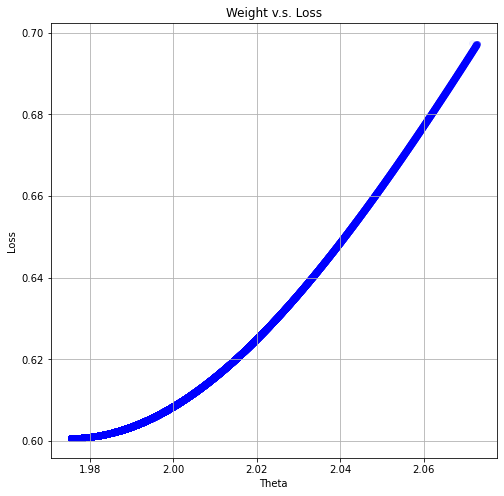

In [213]:
mse_list ,  loss_list ,update_weights_list  = model.update_record()
weight1 = np.array(update_weights_list)[:,1:2,:,].reshape(-1,1)

dataframe = pd.DataFrame(weight1,columns=['Theta'])
dataframe['loss'] = loss_list
dataframe['mse']  = mse_list
dataframe = dataframe.sort_values( by ="loss" , ascending=False )
dataframe


fig,ax = plt.subplots(figsize=(8,8))
ax.set_title("Weight v.s. Loss")
ax.scatter(dataframe['Theta'][6:],dataframe['mse'][6:]          ,color="blue" , alpha=0.06 )
ax.scatter(dataframe['Theta'][6:][-1],dataframe['mse'][6:][-1]  ,color="red"               )

ax.set_xlabel('Theta')
ax.set_ylabel('Loss')
ax.grid()

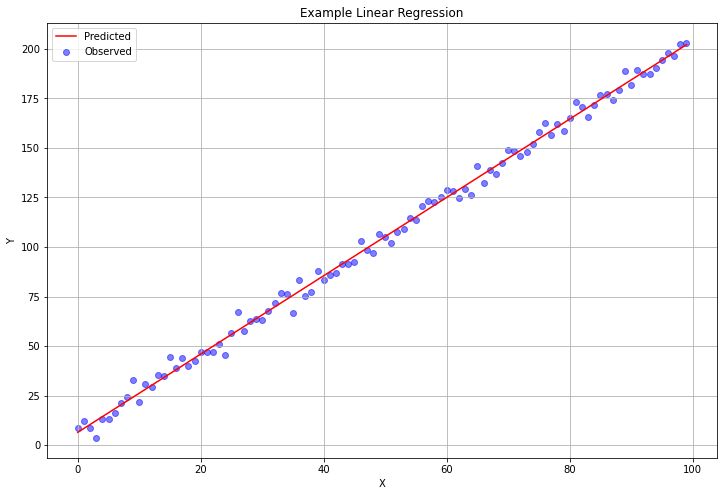

In [220]:

figf,ax = plt.subplots(figsize=(12,8))

ax.set_title('Example Linear Regression')
ax.scatter(Example_Dataset['x'], Example_Dataset['y'],color='blue',alpha=0.5)
ax.plot(Example_Dataset['x'], sm.add_constant(Example_Dataset['x'].values) @ weights ,color='red')

plt.legend(['Predicted', 'Observed'])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()